<a href="https://colab.research.google.com/github/harshs-data/Exploratory-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
### Univariate Analysis of Numeric Col

### Age

**conclusions**

- Age is normally(almost) distributed
- 19.8% of the values are missing
- There are some outliers


In [25]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

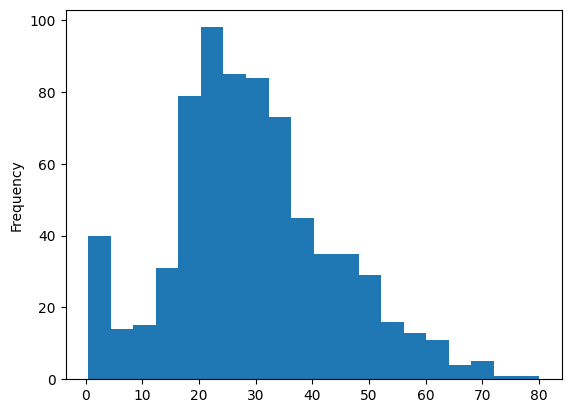

In [26]:
df['Age'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

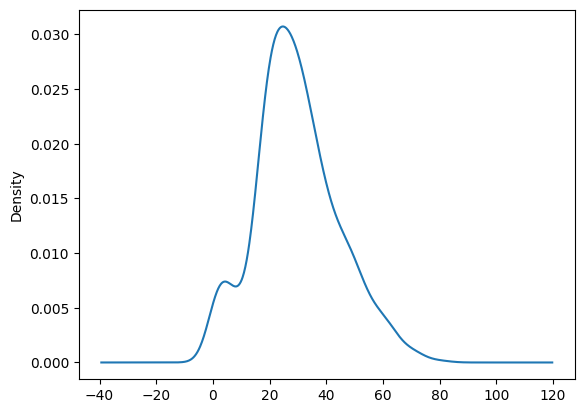

In [27]:
df["Age"].plot(kind = 'kde')

<Axes: >

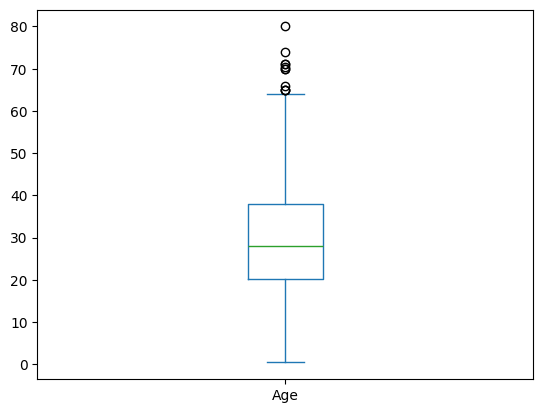

In [28]:
df['Age'].plot(kind = 'box')

In [29]:
df['Age'].isnull().sum()

np.int64(177)

In [30]:
df['Age'].isnull().sum()/len(df["Age"])

np.float64(0.19865319865319866)

### Fare

 **conclusions**
 - The data is highy +ve skewed
 - Fare col actually contains group fair and not the individual fare(This might be an issue)
 - We need to create a new col called individual_fare

In [31]:
df["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [32]:
df[df['Fare'] > 250].sort_values(by = 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [33]:
### Univariate Analysis of Categorical Col

### Survived

**conclusions**
- This indicates that the majority (about 61.6%) of passengers did not survive, and only 38.4% survived.
- The dataset is therefore imbalanced towards non-survivors, which is important to keep in mind for modeling (especially classification).

### Parch & Sibsp

**conclusions**

- Parch and Sibsp cols can be merged to form a new col called family_size
- Create a new col called is_alone


In [34]:
 df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived'>

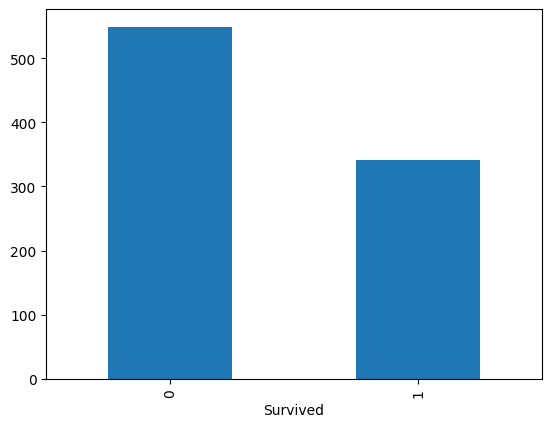

In [37]:
 df['Survived'].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

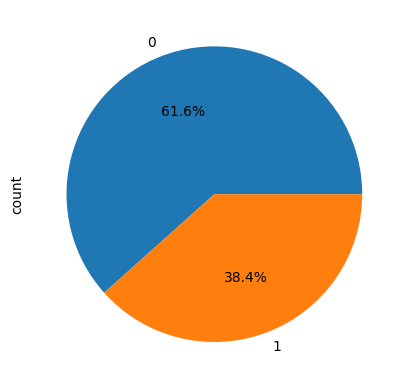

In [38]:
 df['Survived'].value_counts().plot(kind= "pie", autopct = '%0.1f%%')

In [40]:
df['Survived'].isnull().sum()

np.int64(0)

In [41]:
### Bivariate Analysis

In [44]:
pd.crosstab(df['Survived'], df['Pclass'], normalize = "columns")*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

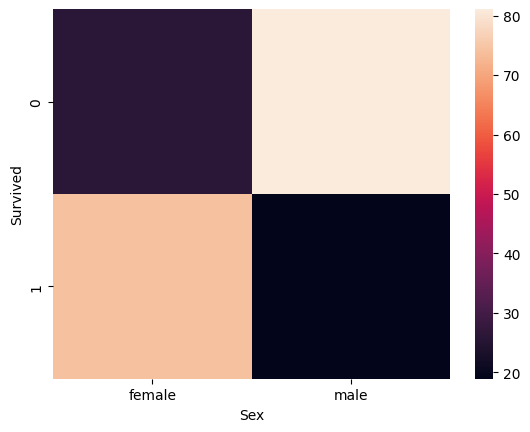

In [55]:
sns.heatmap(pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns')*100)